In [1]:
import cv2 
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline

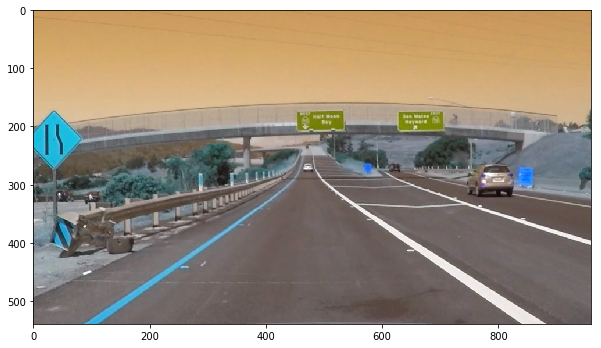

In [62]:
img = cv2.imread("/home/carlos/programming/opencv/images/exit-ramp.jpg")

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

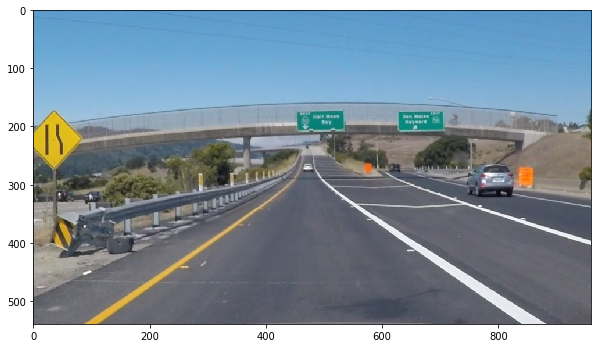

In [61]:
img = cv2.imread("/home/carlos/programming/opencv/images/exit-ramp.jpg")
# we need to convert the image from BGR to RGB
img_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.show()

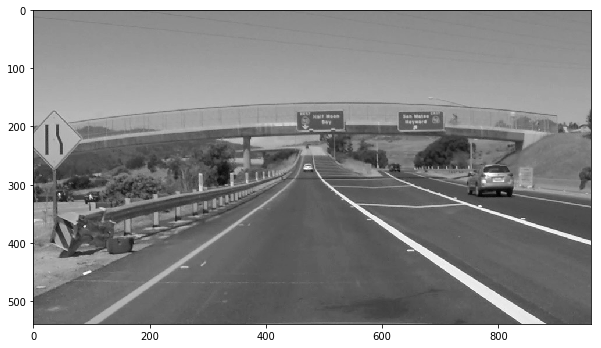

In [60]:
img = cv2.imread("/home/carlos/programming/opencv/images/exit-ramp.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(img_gray, cmap= 'gray')
plt.show()

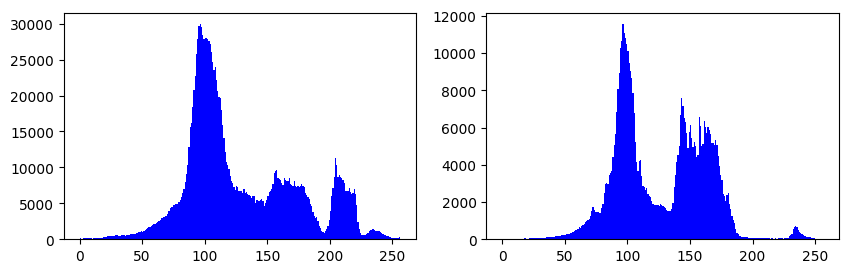

In [69]:
img = cv2.imread("/home/carlos/programming/opencv/images/exit-ramp.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Creating a figure with subplots
plt.subplots(nrows=1, ncols=2, figsize=(10,3), dpi=100)
plt.subplot(1,2,1)
plt.hist(img_rgb.flatten(), 256, [0,256], color = 'b') 
plt.subplot(1,2,2)
plt.hist(img_gray.flatten(), 256, [0,256], color = 'b') 
plt.show()


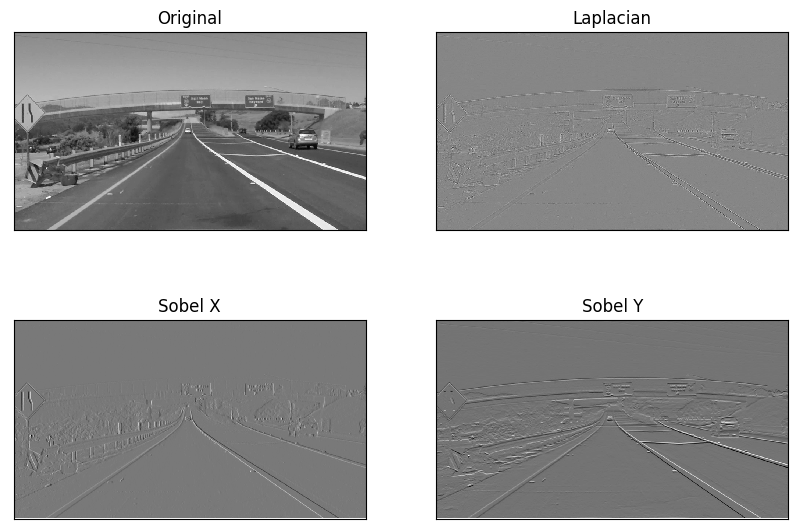

In [70]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

im = cv2.imread("/home/carlos/programming/opencv/images/exit-ramp.jpg",0)

laplacian = cv2.Laplacian(im,cv2.CV_64F)
sobel_x = cv2.Sobel(im,cv2.CV_64F,1,0,ksize=3)
sobel_y = cv2.Sobel(im,cv2.CV_64F,0,1,ksize=3)

plt.subplots(figsize=(10,7), dpi=100)
plt.subplot(2,2,1), plt.imshow(im,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobel_x,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobel_y,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

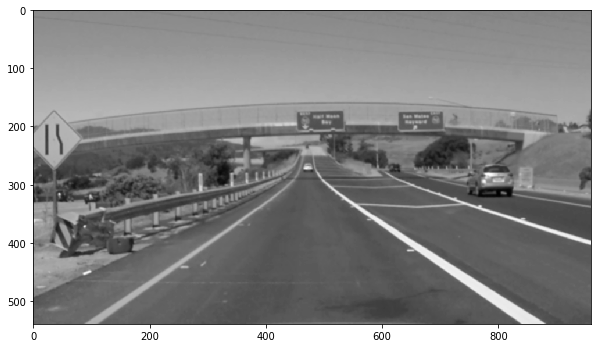

In [71]:
img = cv2.imread("/home/carlos/programming/opencv/images/exit-ramp.jpg")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(img_gray, (kernel_size, kernel_size), 0)

plt.figure(figsize=(10,10))
plt.imshow(blur_gray, cmap= 'gray')
plt.show()

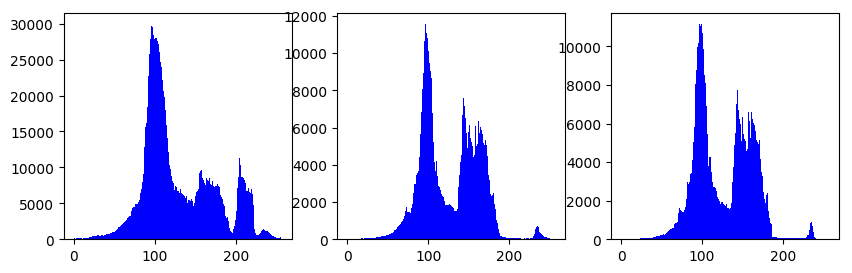

In [72]:
img = cv2.imread("/home/carlos/programming/opencv/images/exit-ramp.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5
blur_gray = cv2.GaussianBlur(img_gray, (kernel_size, kernel_size), 0)

# Creating a figure with subplots
plt.subplots(nrows=1, ncols=3, figsize=(10,3), dpi=100)
plt.subplot(1,3,1)
plt.hist(img_rgb.flatten(), 256, [0,256], color = 'b') 
plt.subplot(1,3,2)
plt.hist(img_gray.flatten(), 256, [0,256], color = 'b') 
plt.subplot(1,3,3)
plt.hist(blur_gray.flatten(), 256, [0,256], color = 'b') 
plt.show()



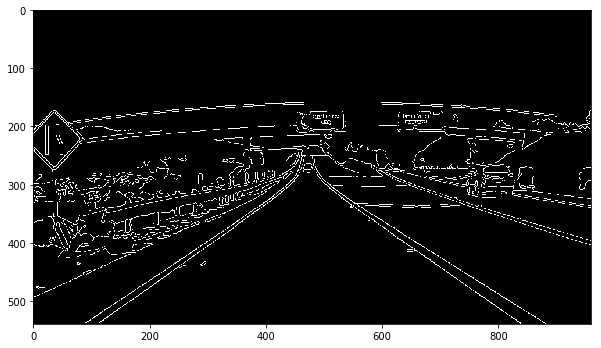

In [73]:
img = cv2.imread("/home/carlos/programming/opencv/images/exit-ramp.jpg",0)
blur_gray = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
# NOTE: if you try running this code you might want to change these!
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='Greys_r')
plt.show()

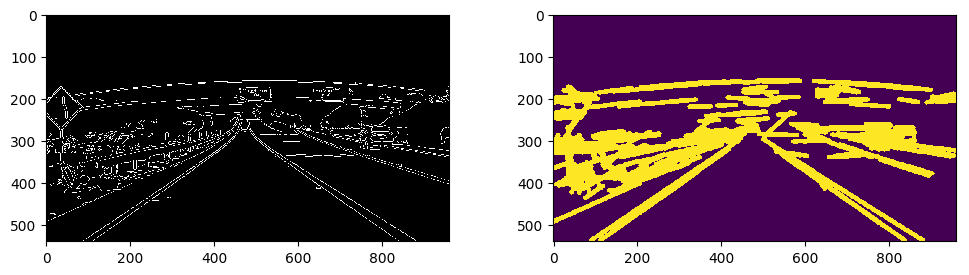

In [75]:
img = cv2.imread("/home/carlos/programming/opencv/images/exit-ramp.jpg",0)
blur_gray = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

# Define parameters for Canny and run it
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

vertices = np.array([[(0,im.shape[0]),(450, 290), (490, 290), (im.shape[1],im.shape[0])]], dtype=np.int32)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2
theta = np.pi/180
threshold = 15
# minimum length of a line (in pixels) that we will accept in the output
min_line_length = 40
# maximum distance (in pixels) between segments that 
# we will allow to be connected into a single line
max_line_gap = 20
line_image = np.copy(img)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 


# Draw the lines on the edge image
#combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 

plt.subplots(figsize=(12,3), dpi=100)
plt.subplot(1,2,1)
plt.imshow(color_edges)
plt.subplot(1,2,2)
plt.imshow(line_image)
plt.show()